In [ ]:
d

Parse Wiki Loves Monuments tables and extract useful information

In [3]:
!pip install geopandas

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 10.9MB 15.8MB/s 
     |████████████████████████████████| 14.8MB 309kB/s 


In [4]:
import pandas as pd
import geopandas as gpd

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
PROJECT_BASE_DIR = "/content/gdrive/My Drive/projects/wikilovesmonuments/"
PROJECT_RAW_DATA_DIR = PROJECT_BASE_DIR+"data/raw/"
PROJECT_MONUMENTSDB_DATA_DIR = PROJECT_BASE_DIR+"data/monumentsdb/"

In [7]:
import matplotlib.pyplot as plt

attrs = ["page_id", "img_name", "img_timestamp"]

def is_valid_lon(value):
  return value>=-180 and value<=180

def is_valid_lat(value):
  return value>=-90 and value<=90


def load_wlm_snaphost(year=2020):
  wlm = pd.read_csv(PROJECT_RAW_DATA_DIR+"wlm_data_2019.tsv.bz2", sep="\t", error_bad_lines=False, warn_bad_lines=False)
  wlm = wlm[wlm.gt_lon.apply(is_valid_lon)]
  wlm = wlm[wlm.gt_lat.apply(is_valid_lat)]
  return gpd.GeoDataFrame(wlm, geometry=gpd.points_from_xy(wlm.gt_lon, wlm.gt_lat))

def plot_wlm_spatial_distribution(data):
  f, ax = plt.subplots(figsize=(12,12), dpi=150)
  data.plot(ax = ax, markersize=0.2)

In [8]:
wlm = load_wlm_snaphost(2019)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [9]:
wlm.columns.values

array(['cl_from', 'cl_to', 'cl_sortkey', 'cl_timestamp',
       'cl_sortkey_prefix', 'cl_collation', 'cl_type', 'page_id',
       'page_namespace', 'page_title', 'page_restrictions',
       'page_is_redirect', 'page_is_new', 'page_random', 'page_touched',
       'page_links_updated', 'page_latest', 'page_len',
       'page_content_model', 'page_lang', 'img_name', 'img_size',
       'img_width', 'img_height', 'img_metadata', 'img_bits',
       'img_media_type', 'img_major_mime', 'img_minor_mime',
       'img_description_id', 'img_actor', 'img_timestamp', 'img_sha1',
       'il_from', 'il_to', 'il_from_namespace', 'gt_id', 'gt_page_id',
       'gt_globe', 'gt_primary', 'gt_lat', 'gt_lon', 'gt_dim', 'gt_type',
       'gt_name', 'gt_country', 'gt_region', 'geometry'], dtype=object)

In [10]:
wlm.head(10)

,cl_from,cl_to,cl_sortkey,cl_timestamp,cl_sortkey_prefix,cl_collation,cl_type,page_id,page_namespace,page_title,page_restrictions,page_is_redirect,page_is_new,page_random,page_touched,page_links_updated,page_latest,page_len,page_content_model,page_lang,img_name,img_size,img_width,img_height,img_metadata,img_bits,img_media_type,img_major_mime,img_minor_mime,img_description_id,img_actor,img_timestamp,img_sha1,il_from,il_to,il_from_namespace,gt_id,gt_page_id,gt_globe,gt_primary,gt_lat,gt_lon,gt_dim,gt_type,gt_name,gt_country,gt_region,geometry
0,81714609,Images_from_Wiki_Loves_Monuments_2019,FETHARD BRIDGE.JPG\nFETHARD BRIDGE.JPG,2019-08-30 10:27:23,Fethard Bridge.jpg,uppercase,file,81714609.0,6,Fethard_Bridge.jpg,NaN,0.0,0.0,0.367843,20200903155945,2.020090e+13,407612563.0,469,wikitext,NaN,Fethard_Bridge.jpg,4.83289e+06,5120.0,3840,"a:56:{s:10:""ImageWidth"";i:5120;s:11:""ImageLeng...",8,BITMAP,image,jpeg,44.0,24020449.0,20190830102722,iixg23jc6ikxpt4kdqt9qo2s7fmze1d,81715231,Fethard_Bridge.jpg,2.0,538867558.0,81714609,earth,1.0,52.188366,-6.838027,1000,camera,NaN,NaN,NaN,POINT (-6.83803 52.18837)
1,81714610,Images_from_Wiki_Loves_Monuments_2019,"SAINT MOGUE'S CHURCH,.JPG\nSAINT MOGUE'S CHURC...",2019-08-30 10:27:24,"Saint Mogue's Church,.jpg",uppercase,file,81714610.0,6,"Saint_Mogue's_Church,.jpg",NaN,0.0,0.0,0.945393,20200903155945,2.020090e+13,394605606.0,441,wikitext,NaN,"Saint_Mogue's_Church,.jpg",7.88935e+06,5120.0,3840,"a:56:{s:10:""ImageWidth"";i:5120;s:11:""ImageLeng...",8,BITMAP,image,jpeg,44.0,24020449.0,20190830102722,0j8bttqb77vdhjnsrgfai66fwp2yzc3,81715231,"Saint_Mogue's_Church,.jpg",2.0,538867559.0,81714610,earth,1.0,52.192974,-6.840688,1000,camera,NaN,NaN,NaN,POINT (-6.84069 52.19297)
2,81745416,Images_from_Wiki_Loves_Monuments_2019,KHELARAM DATA TEMPLE (1).JPG\nKHELARAM DATA TE...,2019-08-31 18:02:19,Khelaram Data Temple (1).jpg,uppercase,file,81745416.0,6,Khelaram_Data_Temple_(1).jpg,NaN,0.0,0.0,0.612345,20200903155945,2.020090e+13,394056266.0,499,wikitext,NaN,Khelaram_Data_Temple_(1).jpg,2.47316e+06,3264.0,2448,"a:28:{s:4:""Make"";s:5:""Nokia"";s:5:""Model"";s:9:""...",8,BITMAP,image,jpeg,44.0,7058142.0,20190831180218,547i28njjmuw98wzdupwc29i75vs3tu,NaN,NaN,NaN,538867562.0,81745416,earth,1.0,23.659728,90.145931,1000,camera,NaN,NaN,NaN,POINT (90.14593 23.65973)
3,81745417,Images_from_Wiki_Loves_Monuments_2019,KHELARAM DATA TEMPLE (2).JPG\nKHELARAM DATA TE...,2019-08-31 18:02:19,Khelaram Data Temple (2).jpg,uppercase,file,81745417.0,6,Khelaram_Data_Temple_(2).jpg,NaN,0.0,0.0,0.036031,20200903155945,2.020090e+13,394056312.0,499,wikitext,NaN,Khelaram_Data_Temple_(2).jpg,2.41827e+06,3264.0,2448,"a:28:{s:4:""Make"";s:5:""Nokia"";s:5:""Model"";s:9:""...",8,BITMAP,image,jpeg,44.0,7058142.0,20190831180218,lrlz6fpkrsii3crpycfmjk4qnc1bgct,NaN,NaN,NaN,538867566.0,81745417,earth,1.0,23.659728,90.145931,1000,camera,NaN,NaN,NaN,POINT (90.14593 23.65973)
4,81745418,Images_from_Wiki_Loves_Monuments_2019,KHELARAM DATA TEMPLE (3).JPG\nKHELARAM DATA TE...,2019-08-31 18:02:20,Khelaram Data Temple (3).jpg,uppercase,file,81745418.0,6,Khelaram_Data_Temple_(3).jpg,NaN,0.0,0.0,0.886109,20200903155945,2.020090e+13,394056326.0,499,wikitext,NaN,Khelaram_Data_Temple_(3).jpg,2.82549e+06,3264.0,2448,"a:28:{s:4:""Make"";s:5:""Nokia"";s:5:""Model"";s:9:""...",8,BITMAP,image,jpeg,44.0,7058142.0,20190831180218,1jsdcftlg922jqyuxxd0tvmczhcxm27,51011154,Khelaram_Data_Temple_(3).jpg,14.0,538867563.0,81745418,earth,1.0,23.659728,90.145931,1000,camera,NaN,NaN,NaN,POINT (90.14593 23.65973)
5,81745424,Images_from_Wiki_Loves_Monuments_2019,KHELARAM DATA TEMPLE (4).JPG\nKHELARAM DATA TE...,2019-08-31 18:02:23,Khelaram Data Temple (4).jpg,uppercase,file,81745424.0,6,Khelaram_Data_Temple_(4).jpg,NaN,0.0,0.0,0.530637,20200903155945,2.020090e+13,394056331.0,499,wikitext,NaN,Khelaram_Data_Temple_(4).jpg,2.46248e+06,3264.0,2448,"a:28:{s:4:""Make"";s:5:""Nokia"";s:5:""Model"";s:9:""...",8,BITMAP,image,jpeg,44.0,7058142.0,20190831180221,2p1ykq0te0az6au5jb5gfjok4n

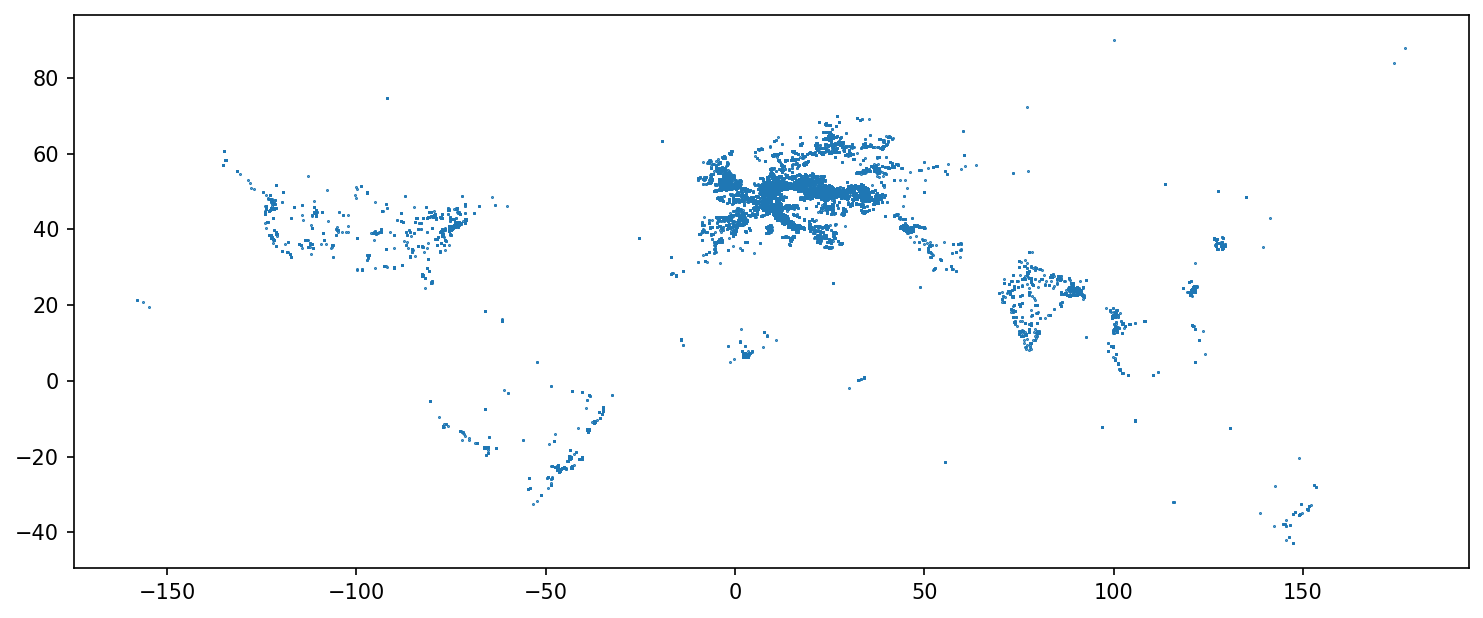

In [11]:
plot_wlm_spatial_distribution(wlm)

In [12]:
monuments = pd.read_csv(PROJECT_MONUMENTSDB_DATA_DIR+"monuments_all_table.csv",error_bad_lines=False, warn_bad_lines=False)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,6,7,8,12,13,14,15,17,18,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
monuments = monuments[monuments.lon.apply(lambda x: isinstance(x, float))]
monuments = monuments[monuments.lat.apply(lambda x: isinstance(x, float))]
monuments.head(1)

,country,lang,project,id,adm0,adm1,adm2,adm3,adm4,name,address,municipality,lat,lon,lat_int,lon_int,image,wd_item,commonscat,source,changed,monument_article,registrant_url
0,ad,ca,wikipedia,100,ad,ad-07,NaN,NaN,NaN,Casa Farràs (Andorra la Vella),"Av. Meritxell, 69",Andorra la Vella,42.509,1.52884,850,31,Casa Farras.jpg,Q97489580,NaN,//ca.wikipedia.org/w/index.php?title=Llista_de...,2020-09-08 14:34:29,Casa_Farràs,http://www.patrimonicultural.ad/banc/article.p...


In [14]:
monuments.columns.values

array(['country', 'lang', 'project', 'id', 'adm0', 'adm1', 'adm2', 'adm3',
       'adm4', 'name', 'address', 'municipality', 'lat', 'lon', 'lat_int',
       'lon_int', 'image', 'wd_item', 'commonscat', 'source', 'changed',
       'monument_article', 'registrant_url'], dtype=object)

In [15]:
monuments_g = gpd.GeoDataFrame(monuments[['country', 'lang', 'project', 'id', 'name', 'address', 'municipality', 'lat', 'lon', 'image', 'wd_item', 'commonscat', 'source',
       'monument_article', 'registrant_url']], geometry=gpd.points_from_xy(monuments.lon, monuments.lat))

In [16]:
def is_valid_lon(value):
  return value>=-180 and value<=180

def is_valid_lat(value):
  return value>=-90 and value<=90

monuments_g = monuments_g[monuments_g.lon.apply(is_valid_lon)]
monuments_g = monuments_g[monuments_g.lat.apply(is_valid_lat)]
monuments_g.shape

(1119793, 16)

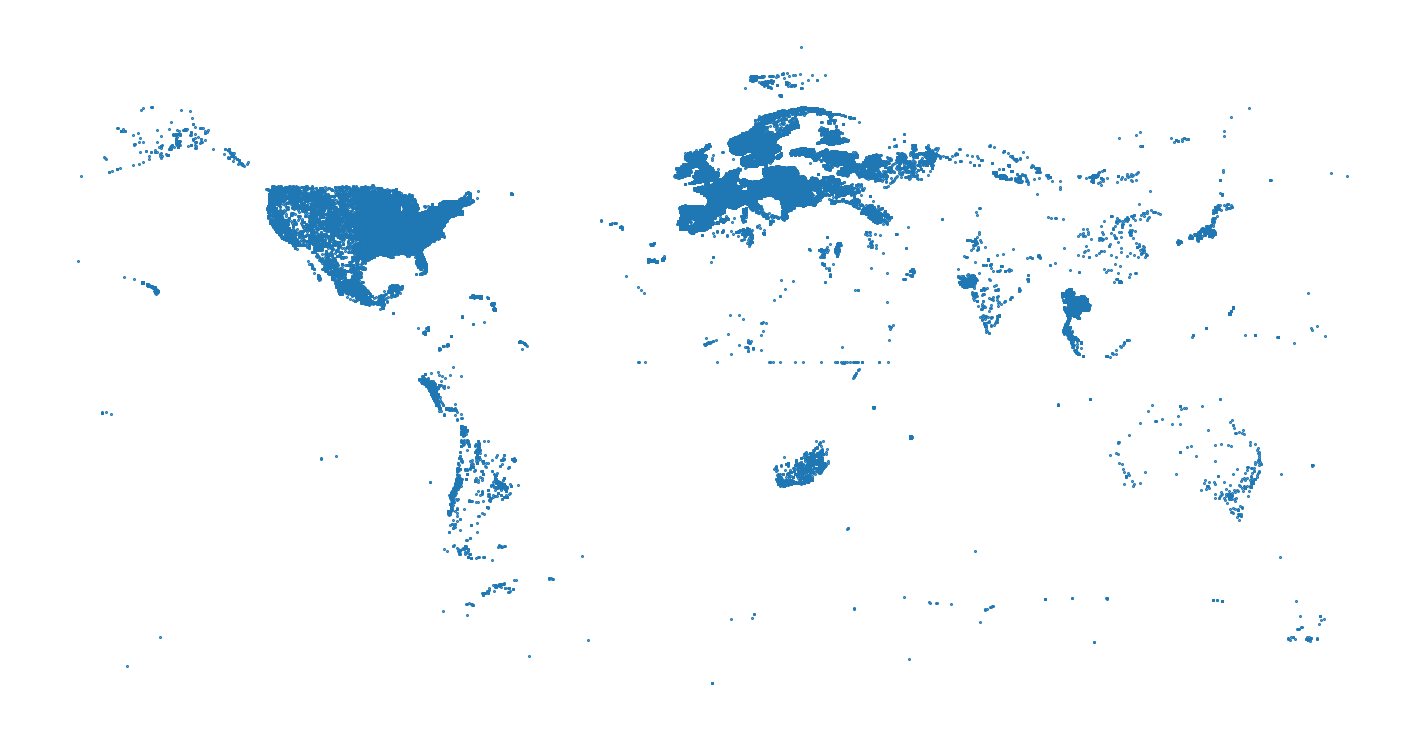

In [17]:
f, ax = plt.subplots(figsize=(12,12), dpi=150)
ax.axis('off')
monuments_g.plot(ax = ax, markersize=0.2)

In [18]:
df = wlm.merge(monuments_g, left_on='img_name', right_on="image", how='inner')

In [19]:
  df = df[df['lang']=='en'] 
  df = df.filter(items=['page_id', 'img_name', 'id', 'name', 'wd_item', 'source', 'monument_article', 'registrant_url', 'geometry_y'])
  df.to_csv(PROJECT_BASE_DIR+"data/en_monuments_in_wlm.csv", index=False)


In [20]:
df

,page_id,img_name,id,name,wd_item,source,monument_article,registrant_url,geometry_y
20,81949608.0,McCOURTIE_ESTATE_trabeio_rustico_covered_bridg...,91001984,[[W.H.L. McCourtie Estate|W.H.L. McCourtie Est...,NaN,//en.wikipedia.org/w/index.php?title=National_...,W.H.L._McCourtie_Estate,NaN,POINT (-84.40833 42.05222)
46,82138772.0,GreeceMemorialHallWorldWarMemorialPlaque.jpg,98000395,[[Greece Memorial Hall|Greece Memorial Hall]],NaN,//en.wikipedia.org/w/index.php?title=National_...,Greece_Memorial_Hall,NaN,POINT (-77.69528 43.20944)
47,82143163.0,WyckoffNJ_JohnCStaggHouse.jpg,83001550,[[John C. Stagg House|John C. Stagg House]],NaN,//en.wikipedia.org/w/index.php?title=National_...,John_C._Stagg_House,NaN,POINT (-74.17194 40.98472)
61,82270683.0,LittleCressenHayes.jpg,1242408,Cressen Hayes and Little Cressen Hayes,NaN,//en.wikipedia.org/w/index.php?title=Grade_II*...,NaN,http://list.english-heritage.org.uk/resultsing...,POINT (-3.82046 50.54127)
62,82270683.0,LittleCressenHayes.jpg,1242408,Cressen Hayes and Little Cressen Hayes,NaN,//en.wikipedia.org/w/index.php?title=Grade_II*...,NaN,http://list.english-heritage.org.uk/resultsing...,POINT (-3.82046 50.54127)
...,...,...,...,...,...,...,...,...,...
1095597,82704303.0,NaN,CiskeiTemp8,"Domira, Lovedale, Victoria East District",NaN,//en.wikipedia.org/w/index.php?title=List_of_h...,NaN,NaN,POINT (26.88333 -32.78333)
1095598,82704303.0,NaN,Graaff-ReinetTemp,"Dutch Reformed Church, Adendorp, Graaff-Reinet...",NaN,//en.wikipedia.org/w/index.php?title=List_of_h...,NaN,NaN,POINT (24.54818 -32.30285)
1095599,82704303.0,NaN,HM\CAPE TOWN METRO\S,"[[Community House (Salt River, Cape Town)|Comm...",NaN,//en.wikipedia.org/w/index.php?title=List_of_h...,NaN,NaN,POINT (18.45760 -33.93000)
1095600,82704303.0,NaN,HM\EDEN\MOSSEL BAY\P,Pinnacle Point,NaN,//en.wikipedia.org/w/index.php?title=List_of_h...,NaN,NaN,POINT (22.09111 -34.20651)


In [21]:
monuments_g.columns.values

array(['country', 'lang', 'project', 'id', 'name', 'address',
       'municipality', 'lat', 'lon', 'image', 'wd_item', 'commonscat',
       'source', 'monument_article', 'registrant_url', 'geometry'],
      dtype=object)

In [22]:
wlm

,cl_from,cl_to,cl_sortkey,cl_timestamp,cl_sortkey_prefix,cl_collation,cl_type,page_id,page_namespace,page_title,page_restrictions,page_is_redirect,page_is_new,page_random,page_touched,page_links_updated,page_latest,page_len,page_content_model,page_lang,img_name,img_size,img_width,img_height,img_metadata,img_bits,img_media_type,img_major_mime,img_minor_mime,img_description_id,img_actor,img_timestamp,img_sha1,il_from,il_to,il_from_namespace,gt_id,gt_page_id,gt_globe,gt_primary,gt_lat,gt_lon,gt_dim,gt_type,gt_name,gt_country,gt_region,geometry
0,81714609,Images_from_Wiki_Loves_Monuments_2019,FETHARD BRIDGE.JPG\nFETHARD BRIDGE.JPG,2019-08-30 10:27:23,Fethard Bridge.jpg,uppercase,file,81714609.0,6,Fethard_Bridge.jpg,NaN,0.0,0.0,0.367843,20200903155945,2.020090e+13,407612563.0,469,wikitext,NaN,Fethard_Bridge.jpg,4.83289e+06,5120.0,3840,"a:56:{s:10:""ImageWidth"";i:5120;s:11:""ImageLeng...",8,BITMAP,image,jpeg,44.0,24020449.0,20190830102722,iixg23jc6ikxpt4kdqt9qo2s7fmze1d,81715231,Fethard_Bridge.jpg,2.0,538867558.0,81714609,earth,1.0,52.188366,-6.838027,1000,camera,NaN,NaN,NaN,POINT (-6.83803 52.18837)
1,81714610,Images_from_Wiki_Loves_Monuments_2019,"SAINT MOGUE'S CHURCH,.JPG\nSAINT MOGUE'S CHURC...",2019-08-30 10:27:24,"Saint Mogue's Church,.jpg",uppercase,file,81714610.0,6,"Saint_Mogue's_Church,.jpg",NaN,0.0,0.0,0.945393,20200903155945,2.020090e+13,394605606.0,441,wikitext,NaN,"Saint_Mogue's_Church,.jpg",7.88935e+06,5120.0,3840,"a:56:{s:10:""ImageWidth"";i:5120;s:11:""ImageLeng...",8,BITMAP,image,jpeg,44.0,24020449.0,20190830102722,0j8bttqb77vdhjnsrgfai66fwp2yzc3,81715231,"Saint_Mogue's_Church,.jpg",2.0,538867559.0,81714610,earth,1.0,52.192974,-6.840688,1000,camera,NaN,NaN,NaN,POINT (-6.84069 52.19297)
2,81745416,Images_from_Wiki_Loves_Monuments_2019,KHELARAM DATA TEMPLE (1).JPG\nKHELARAM DATA TE...,2019-08-31 18:02:19,Khelaram Data Temple (1).jpg,uppercase,file,81745416.0,6,Khelaram_Data_Temple_(1).jpg,NaN,0.0,0.0,0.612345,20200903155945,2.020090e+13,394056266.0,499,wikitext,NaN,Khelaram_Data_Temple_(1).jpg,2.47316e+06,3264.0,2448,"a:28:{s:4:""Make"";s:5:""Nokia"";s:5:""Model"";s:9:""...",8,BITMAP,image,jpeg,44.0,7058142.0,20190831180218,547i28njjmuw98wzdupwc29i75vs3tu,NaN,NaN,NaN,538867562.0,81745416,earth,1.0,23.659728,90.145931,1000,camera,NaN,NaN,NaN,POINT (90.14593 23.65973)
3,81745417,Images_from_Wiki_Loves_Monuments_2019,KHELARAM DATA TEMPLE (2).JPG\nKHELARAM DATA TE...,2019-08-31 18:02:19,Khelaram Data Temple (2).jpg,uppercase,file,81745417.0,6,Khelaram_Data_Temple_(2).jpg,NaN,0.0,0.0,0.036031,20200903155945,2.020090e+13,394056312.0,499,wikitext,NaN,Khelaram_Data_Temple_(2).jpg,2.41827e+06,3264.0,2448,"a:28:{s:4:""Make"";s:5:""Nokia"";s:5:""Model"";s:9:""...",8,BITMAP,image,jpeg,44.0,7058142.0,20190831180218,lrlz6fpkrsii3crpycfmjk4qnc1bgct,NaN,NaN,NaN,538867566.0,81745417,earth,1.0,23.659728,90.145931,1000,camera,NaN,NaN,NaN,POINT (90.14593 23.65973)
4,81745418,Images_from_Wiki_Loves_Monuments_2019,KHELARAM DATA TEMPLE (3).JPG\nKHELARAM DATA TE...,2019-08-31 18:02:20,Khelaram Data Temple (3).jpg,uppercase,file,81745418.0,6,Khelaram_Data_Temple_(3).jpg,NaN,0.0,0.0,0.886109,20200903155945,2.020090e+13,394056326.0,499,wikitext,NaN,Khelaram_Data_Temple_(3).jpg,2.82549e+06,3264.0,2448,"a:28:{s:4:""Make"";s:5:""Nokia"";s:5:""Model"";s:9:""...",8,BITMAP,image,jpeg,44.0,7058142.0,20190831180218,1jsdcftlg922jqyuxxd0tvmczhcxm27,51011154,Khelaram_Data_Temple_(3).jpg,14.0,538867563.0,81745418,earth,1.0,23.659728,90.145931,1000,camera,NaN,NaN,NaN,POINT (90.14593 23.65973)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186214,82214027,Images_from_Wiki_Loves_Monuments_2019,GER — BY — LANDKREIS TRAUNSTEIN — TRAUNSTEIN —...,2020-08-22 16:33:17,GER — BY — Landkreis Traunstein — Traunstein —...,uppercase,file,82214027.0,6,GER_—_BY_—_Landkreis_Traunstein_—_Traunstein_—...,NaN,0.0,0.0,0.873790,20

In [1]:
for g, v in monuments_g.groupby(by="country").count():
  print(g, v)
  break

NameError: ignored

In [2]:
# from google.colab import files

# uploaded = files.upload()

Saving monuments_all_table.csv.bz2 to monuments_all_table.csv.bz2


In [5]:
import pandas as pd
pd.read_csv("monuments_all_table.csv.bz2", error_bad_lines=False)

b'Skipping line 1841: expected 23 fields, saw 25\nSkipping line 1845: expected 23 fields, saw 25\nSkipping line 1938: expected 23 fields, saw 25\nSkipping line 1954: expected 23 fields, saw 24\nSkipping line 1955: expected 23 fields, saw 25\nSkipping line 1956: expected 23 fields, saw 25\nSkipping line 26581: expected 23 fields, saw 29\nSkipping line 26585: expected 23 fields, saw 24\nSkipping line 27804: expected 23 fields, saw 24\nSkipping line 28823: expected 23 fields, saw 25\n'
b'Skipping line 39073: expected 23 fields, saw 24\nSkipping line 41858: expected 23 fields, saw 24\nSkipping line 51611: expected 23 fields, saw 25\nSkipping line 54017: expected 23 fields, saw 25\n'
b'Skipping line 66834: expected 23 fields, saw 24\nSkipping line 74705: expected 23 fields, saw 25\nSkipping line 75430: expected 23 fields, saw 24\nSkipping line 75525: expected 23 fields, saw 24\nSkipping line 75527: expected 23 fields, saw 24\nSkipping line 75529: expected 23 fields, saw 24\nSkipping line 75

,country,lang,project,id,adm0,adm1,adm2,adm3,adm4,name,address,municipality,lat,lon,lat_int,lon_int,image,wd_item,commonscat,source,changed,monument_article,registrant_url
0,ad,ca,wikipedia,100,ad,ad-07,NaN,NaN,NaN,Casa Farràs (Andorra la Vella),"Av. Meritxell, 69",Andorra la Vella,42.509,1.52884,850,31,Casa Farras.jpg,Q97489580,NaN,//ca.wikipedia.org/w/index.php?title=Llista_de...,2020-09-08 14:34:29,Casa_Farràs,http://www.patrimonicultural.ad/banc/article.p...
1,ad,ca,wikipedia,101,ad,ad-07,NaN,NaN,NaN,Escoles d'Andorra la Vella (Andorra la Vella),c. Ciutat de Valls,Andorra la Vella,42.5059,1.51508,850,30,NaN,Q97489582,Escoles d'Andorra la Vella,//ca.wikipedia.org/w/index.php?title=Llista_de...,2020-09-08 14:34:29,Escoles_d'Andorra_la_Vella,http://www.patrimonicultural.ad/banc/article.p...
2,ad,ca,wikipedia,102,ad,ad-07,NaN,NaN,NaN,Font de la plaça d'Andorra (Andorra la Vella),"c. de la Vall, s/n",Andorra la Vella,42.5069,1.52098,850,30,Font de la plaça d'Andorra Andorra photowalk 0...,Q97489583,Font de la plaça d'Andorra,//ca.wikipedia.org/w/index.php?title=Llista_de...,2020-09-08 14:34:29,Font_de_la_plaça_d'Andorra,http://www.patrimonicultural.ad/banc/article.p...
3,ad,ca,wikipedia,103,ad,ad-06,NaN,NaN,NaN,Casa Bonet (Sant Julià de Lòria),"avinguda Verge de Canòlic, 80",Sant Julià de Lòria,42.4686,1.49339,849,30,Casa Bonet- wlm2011 (2).jpg,Q97489585,"Casa Bonet, Andorra",//ca.wikipedia.org/w/index.php?title=Llista_de...,2020-09-08 14:34:29,Casa_Bonet_(Sant_Julià_de_Lòria),http://www.patrimonicultural.ad/banc/article.p...
4,ad,ca,wikipedia,104,ad,ad-06,NaN,NaN,NaN,Casa Balletbó (Sant Julià de Lòria),"avinguda Verge de Canòlic, 78",Sant Julià de Lòria,42.4686,1.49342,849,30,Casa Balletbó.jpg,Q5047785,Casa Balletbó,//ca.wikipedia.org/w/index.php?title=Llista_de...,2020-09-08 14:34:29,Casa_Balletbó,http://www.patrimonicultural.ad/banc/article.p...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624419,za,en,wikipedia,HM\WEST COAST\CEDERB,za,za-wc,NaN,Elands Bay,NaN,Velorenvlei Heritage Village,Velorenvlei Heritage Village,Elands Bay,-32.329,18.3726,-647,367,"Verloren Vlei Heritage Village, Elands Bay 3.jpg",NaN,NaN,//en.wikipedia.org/w/index.php?title=List_of_h...,2020-09-08 14:10:49,NaN,NaN
1624420,za,en,wikipedia,HM\WEST COAST\MATZIK,za,za-wc,NaN,Vanrhynsdorp,NaN,Ratelgat,Ratelgat,Vanrhynsdorp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,//en.wikipedia.org/w/index.php?title=List_of_h...,2020-09-08 14:10:49,NaN,NaN
1624421,za,en,wikipedia,HM\WEST COAST\SALDAN,za,za-wc,NaN,Paternoster,NaN,Pasternoster Midden,Pasternoster Midden,Paternoster,-32.8046,17.9006,-656,358,NaN,NaN,NaN,//en.wikipedia.org/w/index.php?title=List_of_h...,2020-09-08 14:10:49,NaN,NaN
1624422,za,en,wikipedia,HM\WINELANDS\WITZENB,za,za-wc,NaN,Saron,NaN,Saron Mission,Saron Mission,Saron,NaN,NaN,NaN,NaN,"Church, Saron Mission, Saron 2.jpg",NaN,NaN,//en.wikipedia.org/w/index.php?title=List_of_h...,2020-09-08 14:10:49,NaN,NaN
